# APP BEHAVIOUR ANALYSIS USING LOGISTIC REGRESSION

## *BY SRIKAR SEETHIRAJU*

## Aim : Predicting if the Customer opts Subscription using App Behavior Analysis from a complicated CSV file.

## Method of approach used : LOGISTIC REGRESSION (suited the best)

- CSV MANAGEMENT

    - STEP #1: IMPORTING DATA
    - STEP #2: VISUALISATION OF THE DATASET
    - STEP #3: FEATURE ENGINEERING -> PART-1
    - STEP #4: FEATURE ENGINEERING -> PART-2
    - STEP #5: FEATURE ENGINEERING -> PART-3
    
- LOGISTIC REGRESSION

    - STEP #6: DATA PREPROCESSING
    - STEP #7: MODEL TRAINING
    - STEP #8: INTIAL EVALUATION OF MODEL
    - STEP #9: IMPROVING THE MODEL
    - STEP #10: FINAL EVALUATION OF MODEL

---

# STEP #1: IMPORTING DATA

### Importing Libraries

In [1]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import time

### Reading the dataset

In [2]:
dataset = pd.read_csv('appdata10.csv')
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


### Distribution of Numerical Variables

In [3]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


### Feature cleaning

In [4]:
dataset["hour"] = dataset.hour.str.slice(1, 3).astype(int)
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


---

# STEP #2: VISUALISATION OF THE DATASET

### Discarding Non-Numerical Columns

In [5]:
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


### Plotting Histograms of Numerical Columns

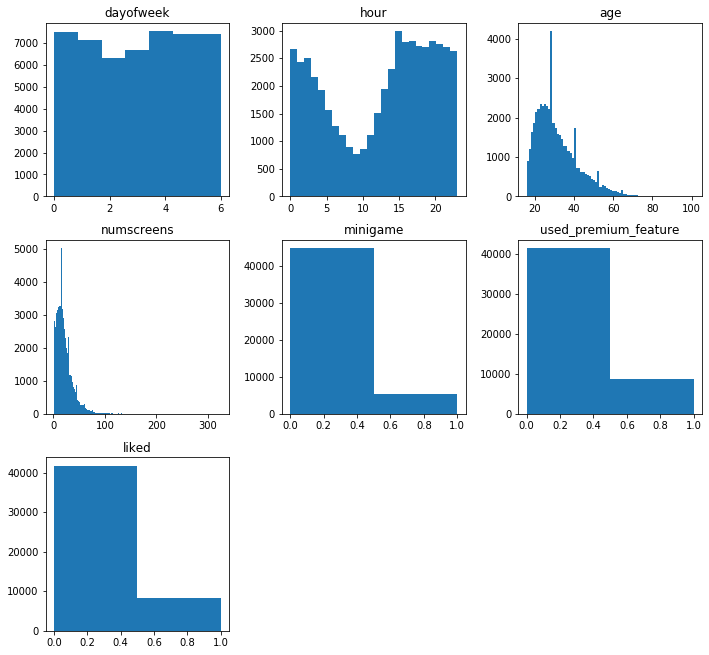

In [6]:
plt.figure(figsize=(10, 10))
for i in range(0, dataset2.shape[1]):
    plt.subplot(3, 3, i+1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    vals = np.size(dataset2.iloc[:, i].unique())    
    plt.hist(dataset2.iloc[:, i], bins=vals)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Correlation with Response Variable

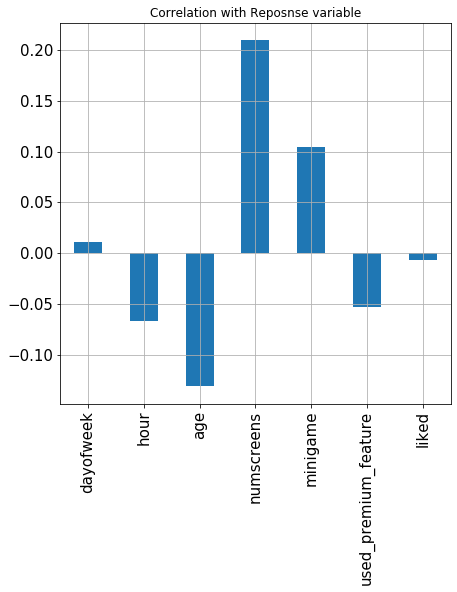

In [7]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(7,7), title = 'Correlation with Reposnse variable', fontsize = 15, rot = 90, grid = True)

### Correlation Matrix - A

In [8]:
sn.set(style="white", font_scale=2)
corr = dataset2.corr()
corr

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
dayofweek,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,-0.005737
hour,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.001725
age,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.002593
numscreens,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,-0.007349
minigame,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,-0.012250
used_premium_feature,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,0.001690
liked,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,1.000000


### Correlation Matrix - B

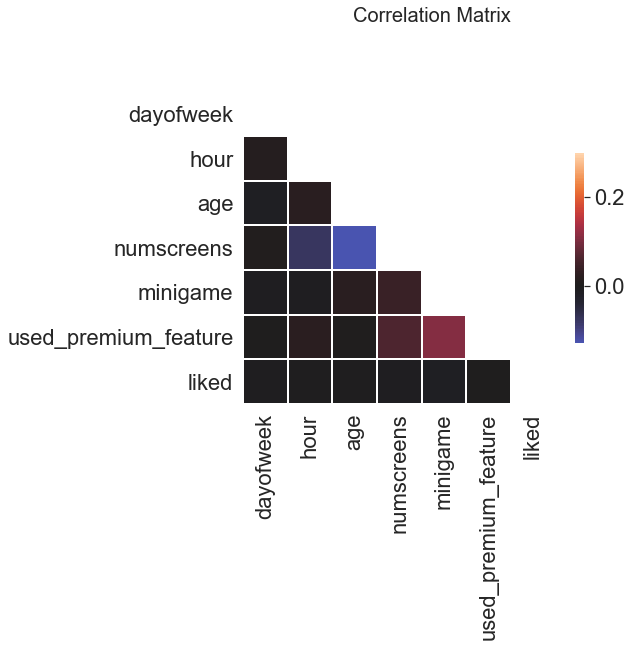

In [9]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7,7))
f.suptitle("Correlation Matrix", fontsize = 20)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, vmax=.3, center=0, square=True, linewidths=1, cbar_kws={"shrink": .5})

# STEP #3: FEATURE ENGINEERING -> PART-1

### View dataset

In [10]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [11]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

### Formatting Date Columns

In [12]:
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]

### Visualising Time For Response

Text(0.5, 1.0, 'Distribution of Time-Since-Screen-Reached')

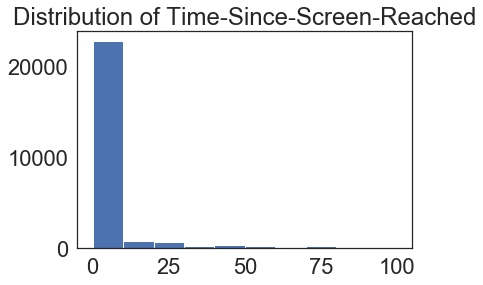

In [13]:
dataset["difference"] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')
plt.hist(dataset["difference"].dropna(), range = [0, 100])
plt.title('Distribution of Time-Since-Screen-Reached')

### View dataset

### Assuming majority enrolls before 48 hours from above plot, neglecting the rest.

In [14]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])

In [15]:
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


---

# STEP #4: FEATURE ENGINEERING -> PART-2

### Loading Top Screens Data

In [16]:
top_screens = pd.read_csv('top_screens.csv')
top_screens.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [17]:
top_screens = top_screens.top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

### Mapping Screens to Fields

In [18]:
dataset["screen_list"] = dataset.screen_list.astype(str) + ','
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan,",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [19]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

dataset['Other'] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns=['screen_list'])
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


In [20]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

---

# STEP #5: FEATURE ENGINEERING -> PART-3

### Funnels

In [21]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]

dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)

In [22]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]

dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

In [23]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]

dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

In [24]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]

dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

### Viewing dataset

In [25]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [26]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [27]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


### Saving Results into new CSV FILE

In [28]:
dataset.to_csv('new_appdata10.csv', index = False)

---

# STEP #6: DATA PREPROCESSING

In [29]:
dataset = pd.read_csv('new_appdata10.csv')
dataset = dataset.drop(columns='user')
dataset.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,3,2,23,15,0,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,6,1,24,13,0,0,0,0,1,1,...,0,0,0,0,0,5,0,0,0,1
2,1,19,23,3,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,16,28,40,0,0,1,0,1,0,...,0,0,0,0,0,6,0,3,0,1
4,1,18,31,32,0,0,1,1,0,1,...,0,0,0,0,0,10,0,2,0,1


### Splitting Input and Output Variables

In [30]:
X = dataset.drop(columns="enrolled").values
y = dataset["enrolled"].values

### Splitting the dataset into the Training set and Test set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

---

# STEP #7: MODEL TRAINING

### Fitting Model to the Training Set

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

---

# STEP #8: INITIAL EVALUATION OF MODEL

In [34]:
y_pred = classifier.predict(X_test)

### Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[3885, 1187],
       [1133, 3795]], dtype=int64)

### Accuracy Score

In [36]:
accuracy_score(y_test, y_pred)

0.768

### Heat Map Visualisation

Test Data Accuracy: 0.7680


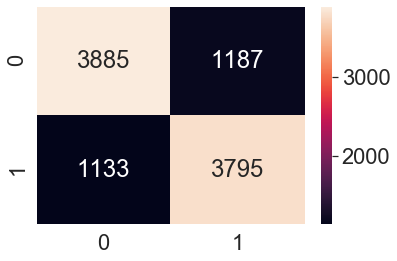

In [37]:
sn.heatmap(cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

---

# STEP #9: IMPROVING THE MODEL

### K-Fold cross validation

In [38]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 76.72 %
Standard Deviation: 0.47 %


### Grid Search

In [39]:
from sklearn.model_selection import GridSearchCV
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
parameters = dict(C=C)
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [40]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 76.73 %
Best Parameters: {'C': 0.01}


---

# STEP #10: FINAL EVALUATION OF MODEL

### Confusion Matrix

In [41]:
y_pred = grid_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

### Accuracy Score

In [42]:
accuracy_score(y_test, y_pred)

0.7695

### Heat Map Visualisation

Test Data Accuracy: 0.7695


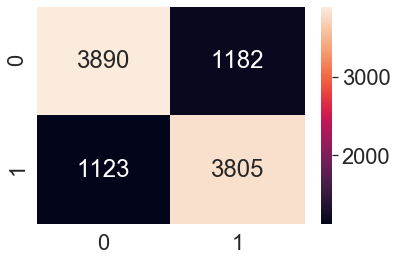

In [43]:
sn.heatmap(cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

---

# *END OF PROJECT*

---